In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
import seaborn as sns
sns.set(color_codes=True)
from sklearn import metrics, preprocessing, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from math import sqrt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
%matplotlib inline


In [28]:
!pip install matplotlib==3.1.0

  Using cached matplotlib-3.1.0.tar.gz (37.2 MB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'
  Rolling back uninstall of matplotlib
  Moving to c:\users\urjas\anaconda3\lib\site-packages\__pycache__\pylab.cpython-38.pyc
   from C:\Users\urjas\AppData\Local\Temp\pip-uninstall-50o64cvs\pylab.cpython-38.pyc
  Moving to c:\users\urjas\anaconda3\lib\site-packages\matplotlib-3.3.4-py3.8-nspkg.pth
   from C:\Users\urjas\AppData\Local\Temp\pip-uninstall-zp9d9wqs\matplotlib-3.3.4-py3.8-nspkg.pth
  Moving to c:\users\urjas\anaconda3\lib\site-packages\matplotlib-3.3.4.dist-info\
   from C:\Users\urjas\anaconda3\Lib\site-packages\~atplotlib-3.3.4.dist-info
  Moving to c:\users\urjas\an

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\urjas\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\urjas\\AppData\\Local\\Temp\\pip-install-1o4pl4qg\\matplotlib_be0c6c7f64b145d98ff21011c25fdb98\\setup.py'"'"'; __file__='"'"'C:\\Users\\urjas\\AppData\\Local\\Temp\\pip-install-1o4pl4qg\\matplotlib_be0c6c7f64b145d98ff21011c25fdb98\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\urjas\AppData\Local\Temp\pip-wheel-535d3bi3'
       cwd: C:\Users\urjas\AppData\Local\Temp\pip-install-1o4pl4qg\matplotlib_be0c6c7f64b145d98ff21011c25fdb98\
  Complete output (499 lines):
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.1.0]
        python: yes [3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit
                    (AMD64)]]
   

# 1. Extract the data

In [30]:
data = pd.read_csv("training.csv")
data.head()

,Exam1,Exam2,Admitted
0,34.6237,78.0247,0
1,30.2867,43.8950,0
2,35.8474,72.9022,0
3,45.0833,56.3164,0
4,95.8616,38.2253,0


In [31]:
data.isnull().sum()

Exam1       0
Exam2       0
Admitted    0
dtype: int64

In [32]:

import pandas_profiling as pp

pp.ProfileReport(data) #to display the report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0, 0.5, 'Exam 2 Score')

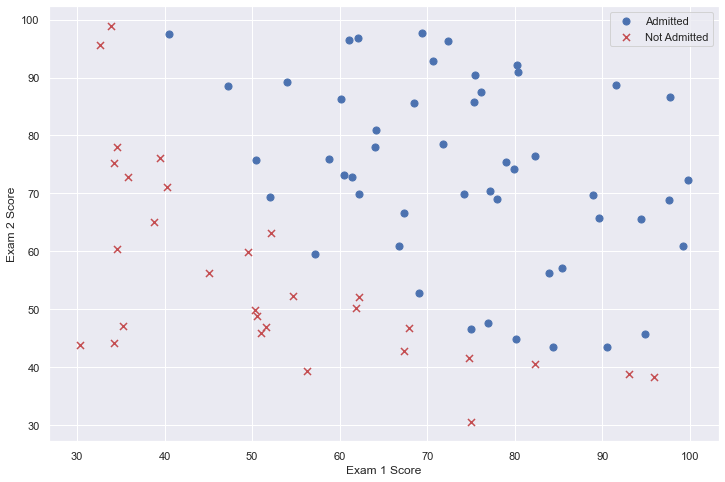

In [33]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam1     80 non-null     float64
 1   Exam2     80 non-null     float64
 2   Admitted  80 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.0 KB


In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Exam1,80.0,65.825728,19.103991,30.2867,51.422725,67.34565,80.006150,99.8279
Exam2,80.0,66.990266,18.374108,30.6033,49.567325,69.20265,79.067225,98.8694
Admitted,80.0,0.625000,0.487177,0.0000,0.000000,1.00000,1.000000,1.0000


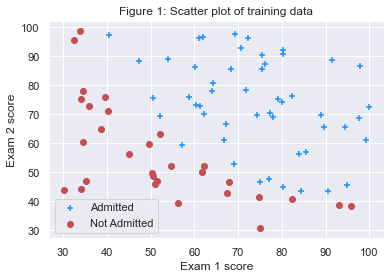

In [36]:
pos = data.loc[data['Admitted'] == 1]
neg = data.loc[data['Admitted'] == 0]

fig, ax = plt.subplots()
ax.scatter(x=pos['Exam1'], y=pos['Exam2'], c='dodgerblue', marker='+', label='Admitted')
ax.scatter(x=neg['Exam1'], y=neg['Exam2'], c='r', marker='o', label='Not Admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.set_title('Figure 1: Scatter plot of training data')
plt.legend()

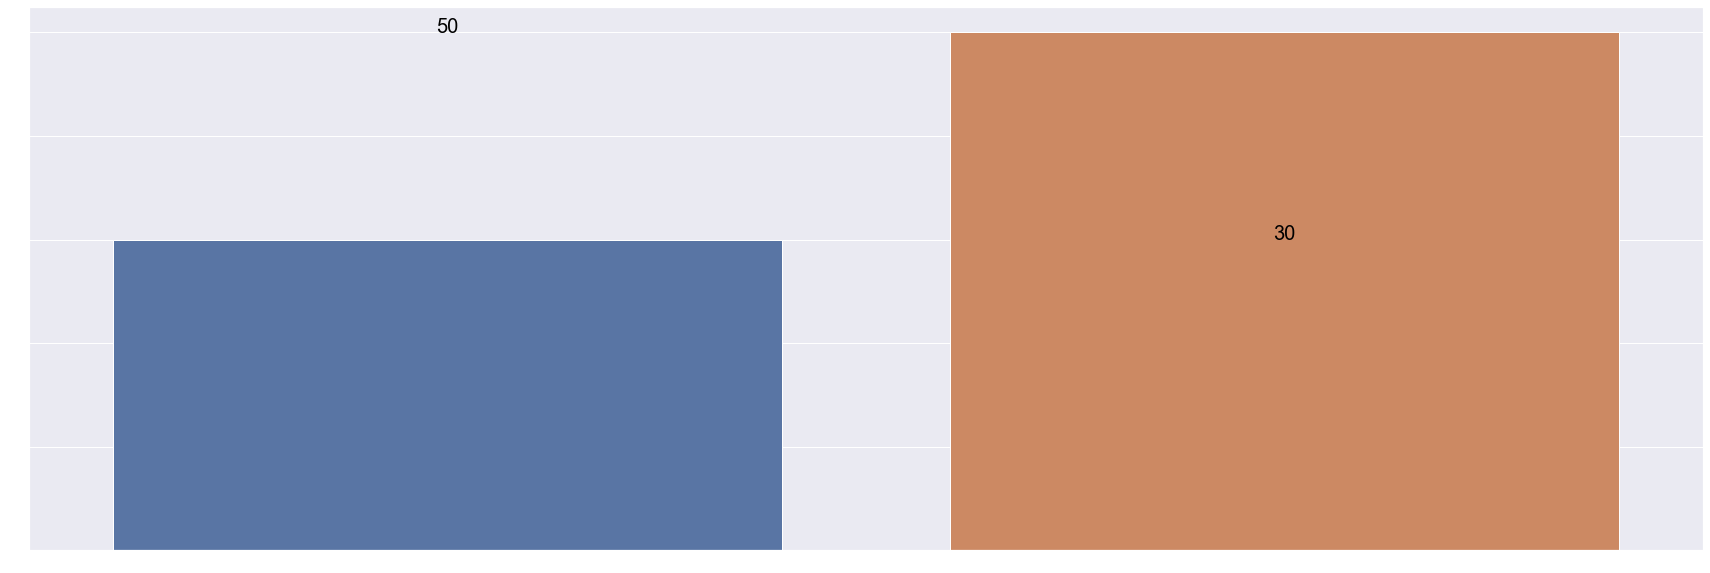

In [37]:
assgn = data['Admitted'].value_counts()
plt.figure(figsize=(30,10))
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
cntplot = sns.barplot(x=assgn.index,y=assgn.values)
cntplot.set_xticklabels(cntplot.get_xticklabels(), rotation=90, ha="right")
for i in range(len(assgn)):
 cntplot.text(i, assgn.values[i], assgn.values[i], color='black', ha='center', fontsize=20)

plt.show()

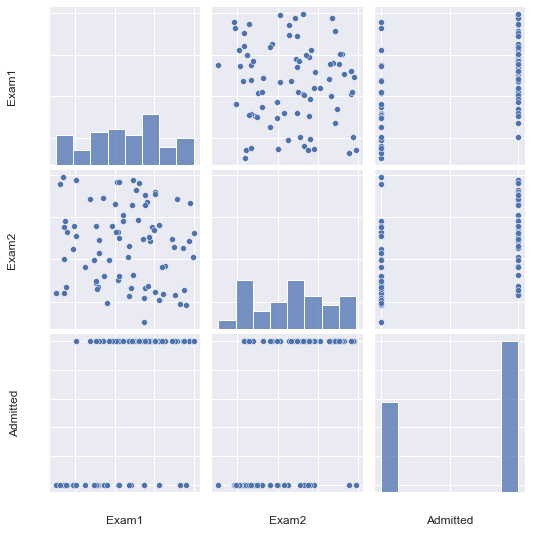

In [38]:
sns.pairplot(data)

<AxesSubplot:>

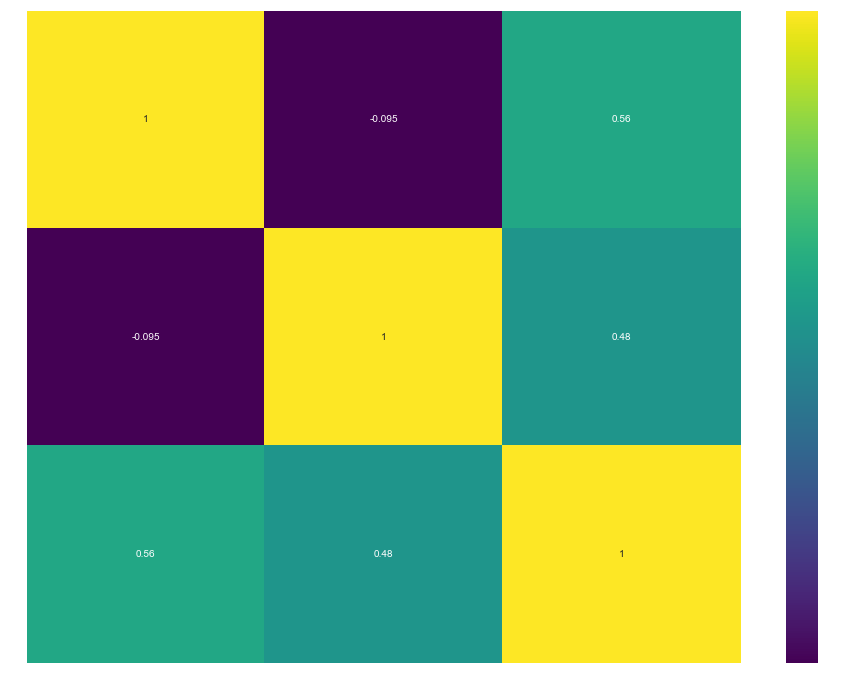

In [39]:
#It seems like the dataset is clean, no null values, all variables are numeric, so we can perform some operations
#First let's try to find some correlation
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), cmap='viridis', annot=True)

# 3. Implementation


K-NEAREST NEIGHBORS (KNN)
KNN: Look at the K closest labeled data points
Classification method.
First we need to train our data. Train = fit
fit(): fits the data, train the data.
predict(): predicts the data
If you do not understand what is KNN, look at youtube there are videos like 4-5 minutes. You can understand better with it.
Lets learn how to implement it with sklearn
x: features
y: target variables(normal, abnormal)
n_neighbors: K. In this example it is 3. it means that Look at the 3 closest labeled data points

In [40]:

X =data[["Exam1","Exam2"]]
y=data["Admitted"]

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier

In [42]:
# Randomly shuffle data 
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [43]:
knn= KNeighborsClassifier(n_neighbors= 3)# taking n_neighbours randomly as 3

knn.fit(x_train1, y_train1)     
y_pred_knn=knn.predict(x_test1)
# performance on train data
print('Performance on training data using DT:',knn.score(x_train1,y_train1))
# performance on test data
print('Performance on testing data using DT:',knn.score(x_test1,y_test1))
print('MSE: ',metrics.mean_squared_error(y_test1, y_pred_knn))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test1, y_pred_knn)))

Performance on training data using DT: 0.9642857142857143
Performance on testing data using DT: 0.7083333333333334
MSE:  0.2916666666666667
RMSE:  0.5400617248673217


In [44]:
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore

In [45]:
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test1, y_pred_knn)))
print("\nClassification report: \n" + str(classification_report(y_test1, y_pred_knn)))


Confusion matrix: 
[[ 4  0]
 [ 7 13]]

Classification report: 
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         4
           1       1.00      0.65      0.79        20

    accuracy                           0.71        24
   macro avg       0.68      0.82      0.66        24
weighted avg       0.89      0.71      0.75        24



In [46]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = knn.predict_proba(x_test1)

In [47]:
from sklearn.model_selection import GridSearchCV
# Define a grid of hyperparameter 'params_dt'
params_knn = {'n_neighbors':[11,15,17],'weights':["uniform","distance"]},
                
# Instantiate 'grid_dt' 
grid_knn = GridSearchCV(estimator=knn, 
                       param_grid=params_knn,
                       cv= 7)

# Fit 'grid_dt' to the training set
grid_knn.fit(x_train1, y_train1)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams_knn = grid_knn.best_params_ 
print('Best hyerparameters:\n', best_hyperparams_knn)

Best hyerparameters:
 {'n_neighbors': 11, 'weights': 'uniform'}


In [48]:
# Applying Gridsearch values
knn1= KNeighborsClassifier(n_neighbors= 11,metric='cityblock',weights='uniform')# taking n_neighbours randomly as 3

knn1.fit(x_train1, y_train1)     
y_pred_knn1=knn1.predict(x_test1)
# performance on train data 
print('Performance on training data using KNN:',knn1.score(x_train1,y_train1))
# performance on test data
print('Performance on testing data using KNN:',knn1.score(x_test1,y_test1))
print('MSE: ',metrics.mean_squared_error(y_test1, y_pred_knn1))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test1, y_pred_knn1)))
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test1, y_pred_knn1)))
print("\nClassification report: \n" + str(classification_report(y_test1, y_pred_knn1)))

Performance on training data using KNN: 0.9642857142857143
Performance on testing data using KNN: 0.7916666666666666
MSE:  0.20833333333333334
RMSE:  0.45643546458763845

Confusion matrix: 
[[ 4  0]
 [ 5 15]]

Classification report: 
              precision    recall  f1-score   support

           0       0.44      1.00      0.62         4
           1       1.00      0.75      0.86        20

    accuracy                           0.79        24
   macro avg       0.72      0.88      0.74        24
weighted avg       0.91      0.79      0.82        24



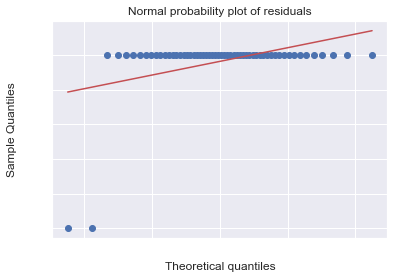

In [49]:
predicted_values = knn1.predict(x_train1)
residuals = predicted_values - y_train1

stats.probplot(residuals, plot=plt)
plt.ylabel('Sample Quantiles')
plt.title('Normal probability plot of residuals')
plt.show()

In [50]:
from sklearn.metrics import roc_curve
y_pred_proba = knn1.predict_proba(x_test1)[:,1]
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba)

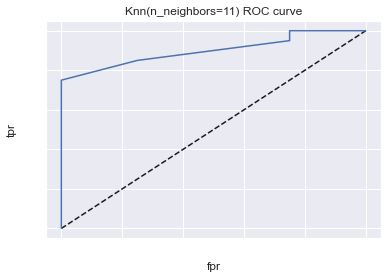

In [51]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [52]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test1,y_pred_proba)

0.8999999999999999

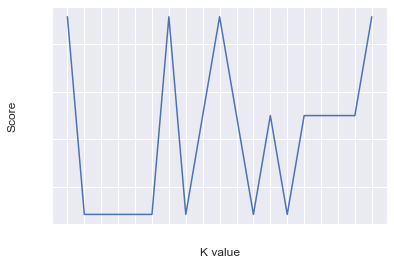

Maximum KNN Score is 79.17%


In [53]:
# try ro find best k value
scoreList = []
accuracies={}
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train1, y_train1)
    scoreList.append(knn2.score(x_test1, y_test1))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

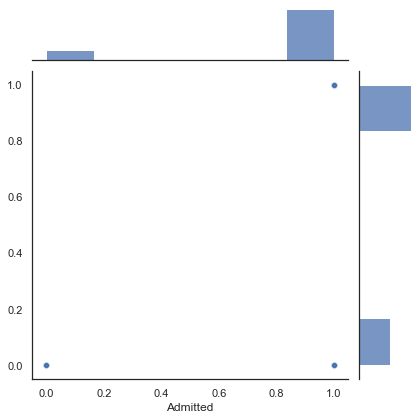

In [59]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test1, y=y_pred_knn1 );

In [60]:
#importing the K fold
from sklearn.model_selection import KFold
num_folds = 5
kfold = KFold(n_splits=num_folds, random_state=None)
results_knn = cross_val_score(knn1,X, y, cv=kfold)
accuracy_knn=np.mean(abs(results_knn))
print('Average accuracy: ',accuracy_knn)
print('Standard Deviation: ',results_knn.std())

Average accuracy:  0.7
Standard Deviation:  0.1695582495781317


In [61]:
data1 = pd.read_csv("testing.csv")
data1.head()

,Exam1,Exam2,Admitted
0,30.0588,49.5930,0
1,44.6683,66.4501,0
2,66.5609,41.0921,0
3,49.0726,51.8832,0
4,32.7228,43.3072,0


In [62]:
X1=data1[['Exam1','Exam2']]


In [63]:
y_pred2 = knn1.predict(X1)
print(y_pred2)
print(data1['Admitted'])


[0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1]
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: Admitted, dtype: int64
